# 1. Setting the Environment
 
## Download and Install Anaconda

* <a href = "https://docs.continuum.io/anaconda/install/linux.html"> Linux </a> <br> 
* <a href = "https://docs.continuum.io/anaconda/install/windows.html"> Windows </a> <br>
* <a href = "https://docs.continuum.io/anaconda/install/mac-os"> mac OS </a> <br>

## Enabling R in Jupyter

### For Windows

<p><strong>Step 1:</strong> Update your ipython notebook with this command</p>

<pre><code>conda update ipython-notebook</code></pre>

<p><strong>Step 2:</strong> Install IRkernel</p>

<pre><code>conda install -c r ipython-notebook r-irkernel</code></pre>

<p><strong>Step 3:</strong> You can now open R in your commands prompt with this command.</p>

<pre><code>R.exe</code></pre>

<p><strong>Step 4:</strong> Install some necessary packages used by R kernel on ipython notebook</p>

<pre><code>install.packages(c('rzmq','repr','IRkernel','IRdisplay'), repos = 'http://irkernel.github.io/', type = 'source')</code></pre>

<p><strong>Step 5:</strong> After the packages are successfully downloaded and installed. Type this:</p>

<pre><code>IRkernel::installspec()</code></pre>

<p><strong>Step 6:</strong> Type quit</p>

<pre><code>quit()</code></pre>

<p><strong>Step 7:</strong> Start your ipython notebook now</p>

<pre><code>ipython notebook</code></pre>

#### OR

<a href = "https://docs.continuum.io/anaconda/navigator/getting-started.html#navigator-install-package"> Install R via anaconda navigator</a>

###  For Linux and macOS

Refer <a href =  "https://irkernel.github.io/installation/#binary-panel">RKernel Installation Guide</a>

# 2. 'R'eview

### Go through "base-r.pdf"....

# 3.  Getting Twitter API Keys

<p>To start with, you will need to have a Twitter account and obtain credentials (i.e. API key, API secret, Access token and Access token secret) on the Twitter developer site to access the Twitter API, following these steps:</p>

<ul>
  <li>Create a Twitter user account if you do not already have one.</li>
  <li>Go to <a href="https://apps.twitter.com/">https://apps.twitter.com/</a> and log in with your Twitter user account. This step gives you a Twitter dev account under the same name as your user account.</li>
  <li>Click “Create New App”</li>
  <li>Fill out the form, agree to the terms, and click “Create your Twitter application”</li>
  <li>In the next page, click on “Keys and Access Tokens” tab, and copy your “API key” and “API secret”. Scroll down and click “Create my access token”, and copy your “Access token” and “Access token secret”.</li>
</ul>

Source : analyticvidhya.com, socialmedia-class.org

# 4. Extracting Tweets

### Download the necessary packages
<pre><code>install.packages(c('twitteR','ROAuth','httr','plyr'))</code></pre>


In [2]:
# Importing Packages
library(twitteR)
library(ROAuth)
library(httr)
library(plyr)

# Set API Keys
api_key <- "P1bCSdgmTZrjB3eCMgMp22uCb"
api_secret <- "3rL9aHkvl0BFwulgkjllXX3yuEEb01mdVRb93ktkpUIC8vusD1"
access_token <- "4000808534-X8YvgRsJgQHgEYpt6HXZAczvGOj4lbBrwPbbIae"
access_token_secret <- "Oetn4nCsNCJGVckGHixM3gU2nzSi79VmLSbq41dHJ2JzF"
setup_twitter_oauth(api_key, api_secret, access_token, access_token_secret)


[1] "Using direct authentication"


In [3]:
tweets <- searchTwitter("Trump", n=1000) # tweets
#print(tweets)
tweetsDF <- twListToDF(tweets) # more info about tweets.
#Writing Data Frame to a csv file
write.csv(tweetsDF, "tweets_info_r.csv")
tweets_ = tweetsDF['text']

In [4]:
#print(tweets_)

# 5. Finding the Famous Tweets

In [5]:
sorted_tweets = tweetsDF[c('text', 'favoriteCount', 'retweetCount')]
sorted_tweets['total'] = tweetsDF['favoriteCount'] + tweetsDF['retweetCount'] 
sorted_tweets = sorted_tweets[c('text', 'total')]
total_ = sorted_tweets[['total']]
sorted_tweets = sorted_tweets[order(-total_), ]

famous_tweets = c()

already_present = function(t){
    for(tweet in famous_tweets){
        if(tweet == t){
            return(TRUE)
        }
    }
    return(FALSE)
}

cnt = 0
for(tweet in sorted_tweets[[1]]){
    if(already_present(tweet) == FALSE){
        famous_tweets = c(famous_tweets, tweet)
        cnt = cnt + 1
        #print(cnt)
        if(cnt == 10){
            break
        }
    }
}

print(famous_tweets)

 [1] "RT @YG: We been told y'all FUCK DONALD TRUMP."                                                                                                                     
 [2] "RT @goldengateblond: Miss Texas was asked if Trump handled Charlottesville badly. She, uh ... didn't play. \xed\xa0\xbc\xed\xb7\xba\xed\xa0\xbc\xed\xb7\xb8 #MissAmerica https://t.co/5JM…"
 [3] "RT @shadesof666: she called Trump out on his shit and dragged him to filth at a pageant that he funds. Miss Texas you're doing amazing swee…"                      
 [4] "RT @GeorgeTakei: Overheard:\nDonald Trump: Climate change isn't real!\nMother Nature: Here, hold my covfefe."                                                      
 [5] "RT @brianklaas: 16 years ago, today, Trump talked about how his building was now the tallest one since the World Trade Center fell. https:/…"                      
 [6] "RT @troyesivan: Remember when Trump said more direct and scathing things about Meryl Streep than actual Nazi terrorists?

# 6. Creating Word Corpus

### Download the necessary packages
<pre><code>install.packages(c('tm', 'SnowballC', 'stringr'))</code></pre>

In [6]:
library(tm)
library(SnowballC)
library(stringr)

usableText = str_replace_all(sorted_tweets$text,"[^[:graph:]]", " ") 
corpus = VCorpus(VectorSource(usableText))
corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removeNumbers)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords())
corpus = tm_map(corpus, stemDocument)
corpus = tm_map(corpus, stripWhitespace)

#print(length(corpus))
for(i in 1:length(corpus)){
    #print(corpus[[i]]$content)
}


Loading required package: NLP

Attaching package: ‘NLP’

The following object is masked from ‘package:httr’:

    content



# 7. Finding Frequent Words

In [7]:
dtmr <-DocumentTermMatrix(corpus, control=list(wordLengths=c(4, 20),
                                               bounds = list(global = c(3,27))))
f1 <- c()
f2 <- c()

freqr <- colSums(as.matrix(dtmr))
#length should be total number of terms
print(paste0("Length : ", length(freqr)))

#create sort order (asc)
ordr <- order(freqr,decreasing=TRUE)
#inspect most frequently occurring terms
f1 <- freqr[ordr[1:20]]
print('Most Frequent Terms :')
print(f1)

#inspect least frequently occurring terms
f2 <- freqr[tail(ordr)]
print('Less Frequent Terms :')
print(f2)

print("Word used in more than 10 tweets : ")
findFreqTerms(dtmr,lowfreq=10)


[1] "Length : 670"
[1] "Most Frequent Terms :"
     dont   hillari    bannon     initi jordanuhl      sinc      cruz    funder 
       27        27        26        26        26        26        25        23 
 hurrican      news      said     tweet     court    httpst     never   station 
       23        22        22        22        21        21        21        21 
  thought     break     elect    speech 
       21        20        20        20 
[1] "Less Frequent Terms :"
   weve   whole  within  worker wouldnt    york 
      3       3       3       3       3       3 
[1] "Word used in more than 10 tweets : "


[1] "administr"         "advis"             "ajplus"           
  [4] "america"           "aschultzbarron"    "attack"           
  [7] "babubhaiyaa"       "bannon"            "barronsonlin"     
 [10] "becom"             "best"              "billkristol"      
 [13] "break"             "brought"           "bump"             
 [16] "campaign"          "carri"             "center"           
 [19] "chang"             "charlottesvill"    "china"            
 [22] "claim"             "climat"            "clinton"          
 [25] "condemn"           "contrapoint"       "countri"          
 [28] "court"             "cruz"              "daca"             
 [31] "didnt"             "dont"              "elect"            
 [34] "event"             "fell"              "former"           
 [37] "franci"            "funder"            "good"             
 [40] "great"             "greet"             "hate"             
 [43] "help"              "hillari"           "honest"           
 [46] "hong"              "hous"              "httpst"           
 [49] "httpstc"           "httpstcofnruishmk" "httpstcoibkvxipk" 
 [52] "hurrican"          "illeg"             "impact"           
 [55] "initi"             "investor"          "iran"             
 [58] "jalloyd"           "jordanuhl"         "know"             
 [61] "kong"              "latest"            "legal"            
 [64] "listen"            "love"              "maga"             
 [67] "make"              "media"             "memori"           
 [70] "mexico"            "moment"            "muslim"           
 [73] "nazi"              "need"              "never"            
 [76] "neverforget"       "news"              "obama"            
 [79] "pardon"            "play"              "polit"            
 [82] "politico"          "pope"              "porn"             
 [85] "potus"             "protest"           "realdonaldtrump"  
 [88] "realli"            "rememb"            "republican"       
 [91] "rescind"           "resist"            "retweet"          
 [94] "right"             "russian"           "said"             
 [97] "senat"             "send"              "septemb"          
[100] "sinc"              "speech"            "station"          
[103] "still"             "suprem"            "supremacist"      
[106] "sustain"           "take"              "talk"             
[109] "thought"           "time"              "today"            
[112] "tower"             "trade"             "travel"           
[115] "tuesday"           "tweet"             "twitter"          
[118] "vote"              "wall"              "watch"            
[121] "work"              "world"             "year"             
[124] "youtub"            "zero"

# 8. Plotting Word Frequency

### Download the necessary packages
<pre><code>install.packages(c('ggplot2'))</code></pre>


Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate



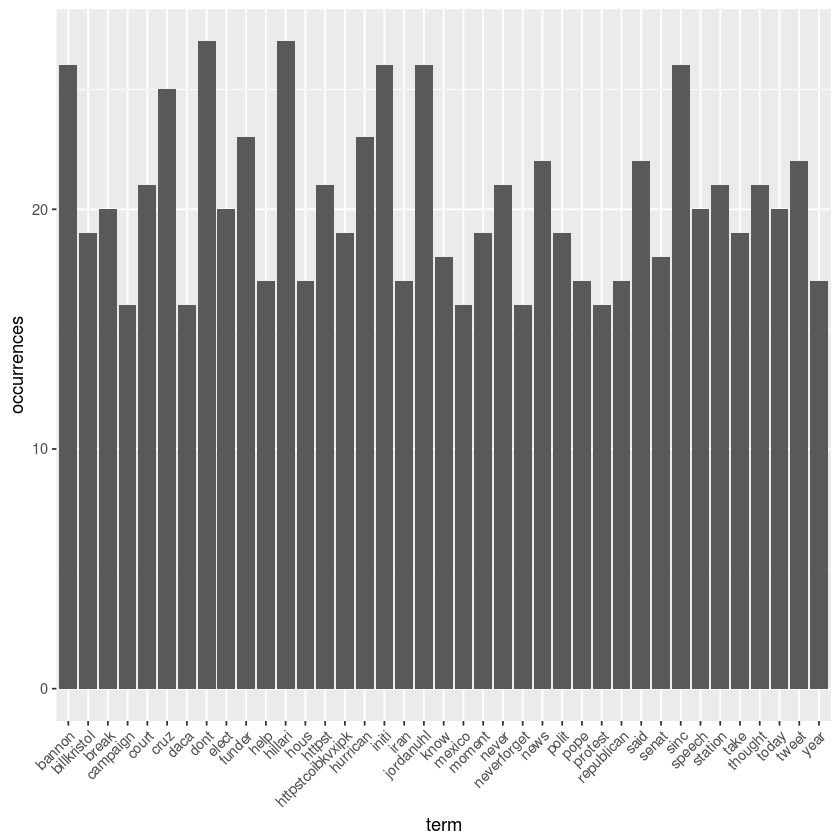

In [8]:
library(ggplot2)
options(jupyter.plot_mimetypes = 'image/png')
wf=data.frame(term=names(freqr),occurrences=freqr)
p <- ggplot(subset(wf, freqr>15), aes(term, occurrences))
p <- p + geom_bar(stat='identity')
p <- p + theme(axis.text.x=element_text(angle=45, hjust=1))
print(p)

# 9. Score Generation

In [9]:
pos = readLines("positive_words.txt")
neg = readLines("negative_words.txt")
review_txt = sapply(tweets, function(x) x$getText())

nd = c(length(review_txt), length(review_txt))

score.sentiment = function(sentences, pos.words, neg.words, .progress='none') {
  # Parameters
  # sentences: vector of text to score
  # pos.words: vector of words of postive sentiment
  # neg.words: vector of words of negative sentiment
  # .progress: passed to laply() to control of progress bar
  
  # create simple array of scores with laply
  scores = laply(sentences,
     function(sentence, pos.words, neg.words)
     {
       # remove punctuation
       sentence = gsub("[[:punct:]]", "", sentence)
       # remove control characters
       sentence = gsub("[[:cntrl:]]", "", sentence)
       # remove digits?
       sentence = gsub('\\d+', '', sentence)

       # define error handling function when trying tolower
       tryTolower = function(x)
       {
         # create missing value
         y = NA
         # tryCatch error
         try_error = tryCatch(tolower(x), error=function(e) e)
         # if not an error
         if (!inherits(try_error, "error"))
           y = tolower(x)
         # result
         return(y)
       }
       # use tryTolower with sapply 
       sentence = sapply(sentence, tryTolower)

       # split sentence into words with str_split (stringr package)
       word.list = str_split(sentence, "\\s+")
       words = unlist(word.list)

       # compare words to the dictionaries of positive & negative terms
       pos.matches = match(words, pos.words)
       neg.matches = match(words, neg.words)

       # get the position of the matched term or NA
       # we just want a TRUE/FALSE
       pos.matches = !is.na(pos.matches)
       neg.matches = !is.na(neg.matches)

       # final score
       score = sum(pos.matches) - sum(neg.matches)
       return(score)
     }, pos.words, neg.words, .progress=.progress )
  # data frame with scores for each sentence
  scores.df = data.frame(text=sentences, score=scores)
  return(scores.df)
  
}

scores = score.sentiment(review_txt, pos, neg, .progress='text')

scores$very.pos = as.numeric(scores$score >= 1)
scores$very.neg = as.numeric(scores$score <= -1)

numpos = sum(scores$very.pos)
numneg = sum(scores$very.neg)

global_score = round( 100 * numpos / (numpos + numneg) )

print(paste0("Final Score : ", global_score))

  |======================================================================| 100%
[1] "Final Score : 73"


# 10. Word Cloud

### Download the necessary packages
<pre><code>install.packages(c('wordcloud'))</code></pre>

Loading required package: RColorBrewer
Warning message in wordcloud(names(freqr), freqr, min.freq = 30, colors = brewer.pal(6, :
“republican could not be fit on page. It will not be plotted.”Warning message in wordcloud(names(freqr), freqr, min.freq = 30, colors = brewer.pal(6, :
“realdonaldtrump could not be fit on page. It will not be plotted.”Warning message in wordcloud(names(freqr), freqr, min.freq = 30, colors = brewer.pal(6, :
“cruz could not be fit on page. It will not be plotted.”Warning message in wordcloud(names(freqr), freqr, min.freq = 30, colors = brewer.pal(6, :
“year could not be fit on page. It will not be plotted.”Warning message in wordcloud(names(freqr), freqr, min.freq = 30, colors = brewer.pal(6, :
“httpst could not be fit on page. It will not be plotted.”Warning message in wordcloud(names(freqr), freqr, min.freq = 30, colors = brewer.pal(6, :
“initi could not be fit on page. It will not be plotted.”Warning message in wordcloud(names(freqr), freqr, min.freq = 30, 

NULL


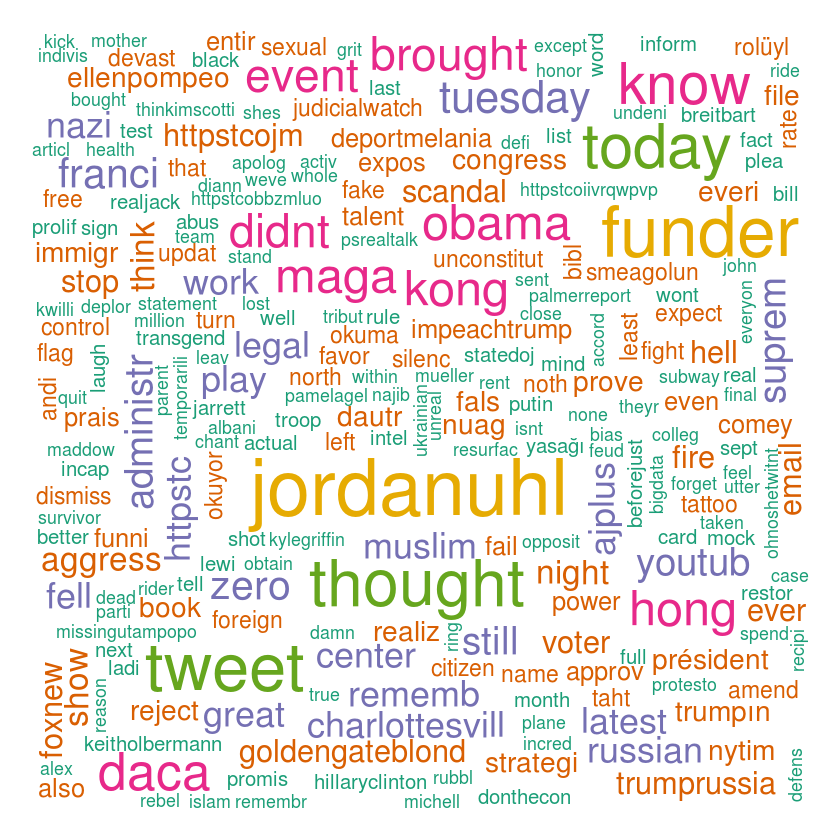

In [10]:
#wordcloud
library(wordcloud)
#setting the same seed each time ensures consistent look across clouds
set.seed(3)
#limit words by specifying min frequency
wcl=wordcloud(names(freqr),freqr, min.freq=30,colors=brewer.pal(6,'Dark2'))
print(wcl)